# Abstract
This project focuses on exploring the vulnerability of machine learning classification models, specifically financial transaction fraud detection systems, to data poisoning attacks. Data poisoning is a technique used in adversarial machin learning, where an attacker is able to inject data into the model's training dataset, or alter the dataset itself, in order to manipulate the model's future behavior. We built two classification models, a model using a torch neural network with logistic regression and a decision tree classifier from scikit-learn. 

**approaches**

**results**

**GitHub links**
[Our general repository](https://github.com/tristanmeyer2/CS451-DataPoisoning)

[Our Jupyter Notebook](https://github.com/tristanmeyer2/CS451-DataPoisoning/blob/main/FraudDetection.ipynb)

[Our logistic regression model](https://github.com/tristanmeyer2/CS451-DataPoisoning/blob/main/logRegModel.py)

[Our data preparation file](https://github.com/tristanmeyer2/CS451-DataPoisoning)

# Introduction
Data poisoning is a type of cybersecurity attack aimed at manipulating the training data of a machine learning model in order to introduce unexpected or unintended specific behaviors at the implementation time of the model. We first encountered the topic of data poisoning in the paper, Targeted Backdoor Attacks on Deep Learning Systems Using Data Poisoning, which describes a cyberattack protocol upon a facial recognition system. The paper’s conclusion displays the ability to use a physical key in photographs in a training dataset to manipulate a facial recognition system’s ability to classify a person’s identity reliably, without affecting the model’s accuracy when the physical key is not present (@chen2017targeted).

We were inspired by the wealth of research into attacking generative art models that scrape the web for training data without the consent of the artists whose work the models are trained upon. In specific, the work of the University of Chicago Department of Computer Science’s team, Shawn Shan, et. al., in creating marketable data poisoning filters for artists, such as Glaze and Nightshade. Glaze is a tool for artists that enables them to apply a “style cloak” to their art before publishing online; this cloak applies a filter to their artwork that disrupts a generative model’s ability to train effectively train upon it, while also being imperceptible to the human eye (@shan2023glaze). In a slightly more aggressive manner, Nightshade employs a filter that is directed at text-to-image generative models, and is classified as a prompt-specific data poisoning attack aimed at corrupting a model’s ability to respond to specific targeted prompts. Nightshade applies a filter that does not disrupt a model’s ability to perceive an image, but rather manipulates a model into believing it is perceiving a different image, e.g., cloaking a picture of a cow so that it appears to be a handbag to a generative model. In doing so, Nightshade attacks the effectiveness of a generative art model by manipulating its ability to accurately perceive the artwork that it is trained upon, dramatically decreasing a model’s useability (@shan2024nightshade).

In our project, we aim to recreate the general approaches to a data poisoning attack upon a problem we have seen earlier in our course: financial transaction fraud detection. We hope to create data poisoning attacks on accurate classification models to manipulate a model’s classification output in a targeted manner. In doing so, we believe that our project will illustrate the vulnerabilities of machine learning models, and how those who design and use them ought to create proper security measures in their model’s training procedures, data collection, and data storage.

# Values Statement
We believe that the potential users of our project include machine learning engineers who wish to ensure the security and integrity of their work from those who wish to abuse a company’s reliance on machine learning, security positions within companies that are tasked with issue-spotting in their companies’ models and data protection practices, and companies as a whole, so that they can protect their business operations from manipulation. Others who may benefit from this project include the users who own the data, so that their data and personal information can be better protected, as well as potential victims of fraud, as with the knowledge of how data poisoning works, machine learning engineers can stop more sophisticated fraud attacks.

Many technology users and companies have the potential to be harmed from the practice of data poisoning. If a company releases software that utilizes a machine learning algorithm unprotected from data poisoning attacks, they run the risk of putting out a faulty product that may one day be used maliciously, as well as endangering all of their customers. In the example of a fraud detection system, if a company failed to create sufficient protections against data poisoning attacks, an attacker may be able to manipulate the model in a variety of ways that would financially harm the company and many of its customers, such as forcing the model to always classify a transaction from a certain merchant or customer as fraudulent, allowing fraud from specific sources or in specific sectors to go undetected, or crippling the effectiveness of the entire system.

Due to these risks, we, as aspiring machine learning engineers, hope to better understand the practice of data poisoning so that we can design models and databases in the future that are secure from this threat. Additionally, we believe that some methods of data poisoning can be used for good. As in the aforementioned examples of Glaze and Nightshade, certain methods of preemptive data poisoning can be used to protect intellectual property from automated web scraping and unlicensed model training.

We believe that with a better understanding of what a data poisoning attack looks like, and the extent to which it can detrimentally affect a machine learning model, our work and the work of others can be more secure and safe. If machine learning engineers and database administrators were to create their design processes with possible data poisoning attacks in mind, their models and data protection systems can be more robust, a better asset to their customers and companies, and a tool that users can trust without fear. 

# Materials and Methods

Our data was generated in 2014 by Edgar Alonso Lopez-Rojas and Stefan Axelsson in their paper [BankSim: A Bank Payment Simulation for Fraud Detection Research](https://www.kaggle.com/datasets/ealaxi/banksim1) (@inproceedings). The dataset consists of agent-based simulated financial transactions, synthetically generated based on a sample of transactions provided by a bank in Spain. The main purpose of their paper was to generate accurate and representative synthetic data that can be used for fraud detection research and model building, without using sensitive user-specific data. Each entry in the dataset describes the customer ID of a financial transaction, the age of the transaction (how long ago it occurred), the gender of the customer, the zip code of the payment origin, the merchant ID for the payment, the zip code of the merchant, the category of the payment (e.g., transportation, food, etc.), the payment amount, and a binary variable of whether the payment is fraudulent or not. One potential limitation of our dataset is that they all come from the same bank in Spain, and so the variables of zip code origin and merchant zip code are not useful in our classification models. Additionally, the fraud rates for each transaction category may be only representative of the purchasing habits and fraud rates within this region of Spain, and may not be appropriate to extrapolate upon elsewhere in the world. However, this limitation does not necessarily affect our findings, as we are aiming to manipulate the behavior of a machine learning model, not creating a machine learning model that is useful outside of its localized area.

# Project Notebook

Importing the data: 

This data set includes seven categorical variables:
* Customer = the customer label for the transaction ('C' followed by a unique number for each customer)
* Gender = the gender of the customer
* Zip code Origin = the zip code of the customer where the transaction occurred 
* Merchant = the merchant label for the transaction ('M' followed by a unique number for each customer)
* Zip code Origin = the zip code of the merchant
* Category = the industry assigned to the transaction
* Fraud = whether the transaction was fraud

The data set also includes two quantitative variables: 
* Age = how long ago (in years) the transaction occurred
* Amount = the dollar amount of the transaction

In [607]:
import pandas as pd

df = pd.read_csv("bankPayments.csv")
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [608]:
import seaborn as sns
import numpy as np
import torch
from torch import nn

Here we are exploring various aspects of the data. First, we see how which merchant IDs are the most frequent.

In [609]:
print(df["merchant"].value_counts())

merchant
'M1823072687'    299693
'M348934600'     205426
'M85975013'       26254
'M1053599405'      6821
'M151143676'       6373
'M855959430'       6098
'M1946091778'      5343
'M1913465890'      3988
'M209847108'       3814
'M480139044'       3508
'M349281107'       2881
'M1600850729'      2624
'M1535107174'      1868
'M980657600'       1769
'M78078399'        1608
'M1198415165'      1580
'M840466850'       1399
'M1649169323'      1173
'M547558035'        949
'M50039827'         916
'M1888755466'       912
'M692898500'        900
'M1400236507'       776
'M1842530320'       751
'M732195782'        608
'M97925176'         599
'M45060432'         573
'M1741626453'       528
'M1313686961'       527
'M1872033263'       525
'M1352454843'       370
'M677738360'        358
'M2122776122'       341
'M923029380'        323
'M3697346'          308
'M17379832'         282
'M1748431652'       274
'M1873032707'       250
'M2011752106'       244
'M1416436880'       220
'M1294758098'       191
'M17885

Then, we look at the distribution of gender for within the customers that are committing fraudulent payments.

In [610]:
df1 = df[["gender", "fraud"]]
df1.groupby("gender").aggregate('sum')

,fraud
gender,
'E',7
'F',4758
'M',2435
'U',0


Then, we look at the frequency of fraud within different payment categories; it seems that `health` and `sportsandtoys` have the highest frequency of fraud.

In [611]:
df2 = df[["category", "fraud"]]
df2.groupby("category").aggregate('sum')

,fraud
category,
'es_barsandrestaurants',120
'es_contents',0
'es_fashion',116
'es_food',0
'es_health',1696
'es_home',302
'es_hotelservices',548
'es_hyper',280
'es_leisure',474


Here we are investigating the average dollar amount for financial transaction in each payment category.

In [612]:
df3 = df[["category", "amount"]]
df3.groupby("category").aggregate('mean')

,amount
category,
'es_barsandrestaurants',43.461014
'es_contents',44.547571
'es_fashion',65.666642
'es_food',37.070405
'es_health',135.621367
'es_home',165.670846
'es_hotelservices',205.614249
'es_hyper',45.970421
'es_leisure',288.911303


/Users/tristanmeyer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Visualizing the number of Fraudulent Transactions over different Amounts')]

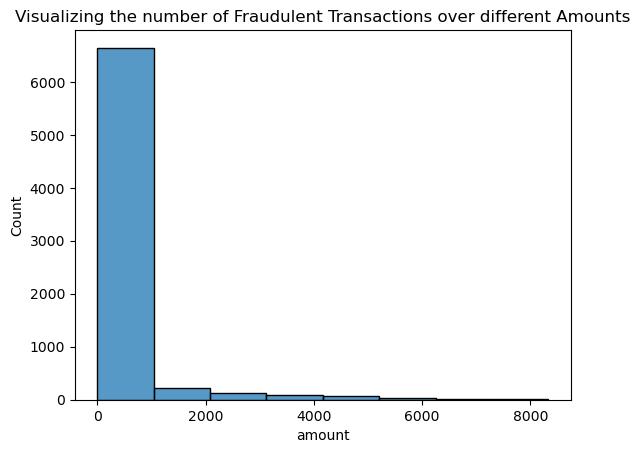

In [613]:
df3 = df[["amount", "fraud"]]
df3 = df3[df3["fraud"] == 1]
v0 = sns.histplot(data=df3, x="amount", bins=8)
v0.set(title="Visualizing the number of Fraudulent Transactions over different Amounts")
#df3['cat_age'] = np.select([df2.amount < 2000, df2.amount < 4000, df2.amount < 6000, df2.amount < 8000], ['<2000', '2000-4000','4000-6000','6000-8000'], '>8000')

This visualization shows the number of fraudulent transactions over different amounts. As the chart shows, the majority of fraudulent transactions occur with amounts under 1000$. 

<Axes: title={'center': 'Visualizing the number of Fraudulent Transactions for each Category'}, xlabel='Fraud Count', ylabel='Category'>

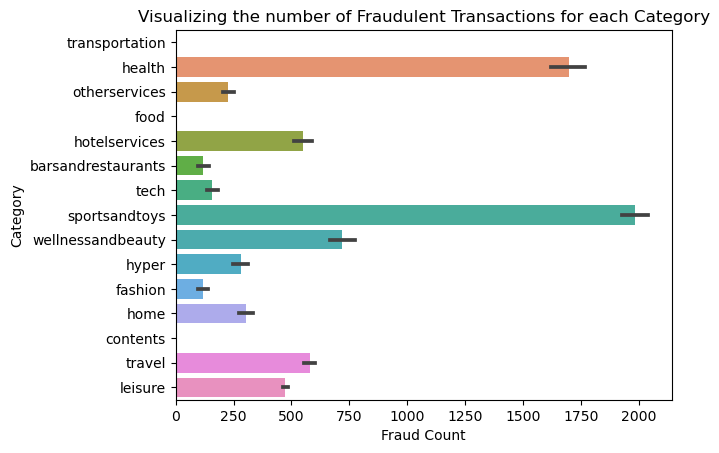

In [614]:
df_vis = df.copy()
df_vis["category"] = df_vis["category"].str.slice(4,-1)

v1 = sns.barplot(df_vis, x="fraud", y="category", estimator="sum")
v1.set(xlabel="Fraud Count", ylabel="Category", title="Visualizing the number of Fraudulent Transactions for each Category")
v1

This chart shows the number of fraudulent transactions in different categories. As shown, the sports and toys, and health categories have the highest amount of fraudulent transactions. 

<Axes: title={'center': 'Visualizing the Average Amount spent per Transaction for each Category'}, xlabel='Average Amount', ylabel='category'>

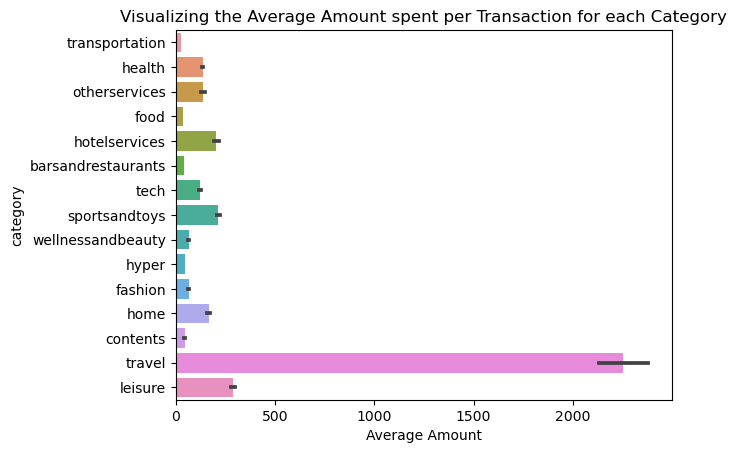

In [615]:
v2 = sns.barplot(df_vis, x="amount", y="category")
v2.set(xlabel="Average Amount", title="Visualizing the Average Amount spent per Transaction for each Category")
v2

This chart visualizes the average amount of transactions in each category. As shown, the travel category has the largest average amount per transaction, with an average over 2000$. 

In [616]:
print(len(df))
print(len(df[df['fraud'] == 0]))
print(len(df[df['fraud'] == 1]))

594643
587443
7200


Our data set contains 594643 total transactions, in which 587443 are not fraud and 7200 are fraud. This different between fraudulent transactions and not fraudulent transactions shows the imbalanced nature of this dataset. 

Now, we will begin training a logistic regression model that can classify fraud. We first turn all of the useful features into one-hot encoded dummy variables that can be represented by a torch tensor. Then, we perform a train/test data split, with our test data being 33% of the total dataset. Then, using our class `PrepareData`, we transform the pandas dataset into a 2D torch tensor that can be used as input for our neural network logistic regression model.

# Decision Tree Model

We then decided to also use a scikit-learn Decision Tree Classifier, so that we can get a better view into what variables are the most important to a fraud detection model and which variables may be most vulnerable to different attacks.

In [618]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection


tree_model = DecisionTreeClassifier(random_state=0)

Here we do some data preprocessing, dropping columns that are not useful or too large to be one-hot encoded.

In [619]:
cols = df.columns
cols = cols.drop(['customer', 'zipcodeOri', 'zipMerchant', 'fraud', 'step'])
X = df[cols]
X = pd.get_dummies(X, dtype= float)
y = df['fraud']

Then we do a train/test split, with our test data being 33% of our total dataset.

In [620]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33)

Now we train our Decision Tree model.

In [621]:
torch.manual_seed(1)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Using cross validation to improve our model.

In [622]:
cross_val_score(tree_model, X_train, y_train, cv = 3)

array([0.99362971, 0.99367484, 0.99373508])

Now we test its effectiveness by analyzing its true positive rate and true negative rates on both training and test data. As we can see, the model performs remarkably well on the training data, and has a sufficiently high fraud detection rate (show by the true positive rate) on the testing data.

In [623]:
from sklearn.metrics import confusion_matrix

train_preds = tree_model.predict(X_train)
y_true = y_train

tn, fp, fn, tp = confusion_matrix(y_true= y_true, y_pred= train_preds).ravel()
print(f'True Positive Rate on Training Data = {tp/(tp+fn)*100:.2f}%')
print(f'True Negative Rate on Training Data = {tn/(tn+fp) * 100:.2f}%')

True Positive Rate on Training Data = 99.67%
True Negative Rate on Training Data = 100.00%


In [624]:
test_preds = tree_model.predict(X_test)
y_true = y_test

tn, fp, fn, tp = confusion_matrix(y_true= y_true, y_pred= test_preds).ravel()
tp_unpoisoned = f'True Positive Rate on Test Data with Unpoisoned Model = {tp/(tp+fn)*100:.2f}%'
tn_unpoisoned = f'True Negative Rate on Test Data with Unpoisoned Model = {tn/(tn+fp) * 100:.2f}%'
print(tp_unpoisoned)
print(tn_unpoisoned)

True Positive Rate on Test Data with Unpoisoned Model = 75.88%
True Negative Rate on Test Data with Unpoisoned Model = 99.70%


Now, we investigate how the variables were used in this decision tree, so that we can find the features of the data that were most important in the classification process, and thus most vulnerable to an injection.

In [625]:
import numpy as np
assert len(X.columns) == len(tree_model.feature_importances_)

importance_data = {
    'feature': X.columns,
    'importance': tree_model.feature_importances_
}
imp = pd.DataFrame(importance_data).sort_values(by= 'importance', axis = 0, ascending = False)
imp.head(10)

,feature,importance
0,amount,0.724951
62,merchant_'M980657600',0.050935
13,merchant_'M1053599405',0.032499
36,merchant_'M1913465890',0.021874
47,merchant_'M480139044',0.020306
71,category_'es_leisure',0.014276
56,merchant_'M855959430',0.008750
3,age_'2',0.007753
15,merchant_'M1198415165',0.007466
4,age_'3',0.007032


## Data Poisoning

Merchant-specific analysis for data poisoning. Here I am looking at the most important merchants in my decision tree, and determining whether they are important because they commit a lot of fraud or because they commit no fraud.

In [626]:
df4 = df[['merchant', 'fraud']]

m_98065_count = df4['merchant'].value_counts()["'M980657600'"]
m_10535_count = df4['merchant'].value_counts()["'M1053599405'"]
m_19134_count = df4['merchant'].value_counts()["'M1913465890'"]
m_48013_count = df4['merchant'].value_counts()["'M480139044'"]

df4 = df4.groupby('merchant')['fraud'].sum()
m_98065_fraud = df4["'M980657600'"]
m_10535_fraud = df4["'M1053599405'"]
m_19134_fraud = df4["'M1913465890'"]
m_48013_fraud = df4["'M480139044'"]

print(f'Rate of fraud for merchant M980657600:  {m_98065_fraud/m_98065_count:0.2f}%')
print(f'Rate of fraud for merchant M1053599405: {m_10535_fraud/m_10535_count:0.2f}%')
print(f'Rate of fraud for merchant M1913465890: {m_19134_fraud/m_19134_count:0.2f}%')
print(f'Rate of fraud for merchant M480139044:  {m_48013_fraud/m_48013_count:0.2f}%')

Rate of fraud for merchant M980657600:  0.83%
Rate of fraud for merchant M1053599405: 0.00%
Rate of fraud for merchant M1913465890: 0.00%
Rate of fraud for merchant M480139044:  0.47%


It seems that merchants M980657600 and M480139044 are important to the decision tree due to their high rates of fraud, while merchants M1053599405 and M1913465890 are important due to their extremely low rate of fraud.

In [627]:
df5 = df[['amount', 'fraud']].groupby('fraud').aggregate(np.mean)
df5


/var/folders/nr/wxklmm8n7v1986xxzzsjr73m0000gn/T/ipykernel_68012/2916388471.py:1: FutureWarning: The provided callable <function mean at 0x7fd32d8fbe50> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df5 = df[['amount', 'fraud']].groupby('fraud').aggregate(np.mean)


,amount
fraud,
0,31.847230
1,530.926551


As we can see here, the dollar amount for fraudulent transactions are often far higher than the dollar amount for non-fraudulent transactions. Note that the mean dollar amount for fraudulant transactions is $31.85 and the mean for fraudulent transactions is $530.93. We will use these for the injection amounts in trying to manipulate the model. Therefore, a possible attack on this model could consist of either injecting data points with low-dollar amounts that come from merchants with high-fraud rates, or data points with high-dollar amounts that come from merchants with low-fraud rates. These data points will be classified as 'no fraud', and we will analyze how this injection impacts the overall accuracy of the model.

With the high-fraud rate merchant M980657600, do the low-dollar amount injection

In [628]:
m_98065_examples = df[df['merchant'] == "'M980657600'"]
m_98065_examples.head(10)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
346,0,'C1082594377','2','F','28007','M980657600','28007','es_sportsandtoys',88.20,0
466,0,'C1817318774','2','F','28007','M980657600','28007','es_sportsandtoys',106.29,0
604,0,'C1685492470','2','F','28007','M980657600','28007','es_sportsandtoys',278.02,1
605,0,'C1275518867','5','F','28007','M980657600','28007','es_sportsandtoys',69.53,1
681,0,'C394488921','5','F','28007','M980657600','28007','es_sportsandtoys',21.56,0
865,0,'C212188289','4','M','28007','M980657600','28007','es_sportsandtoys',16.84,0
1004,0,'C1275518867','5','F','28007','M980657600','28007','es_sportsandtoys',305.11,1
1005,0,'C1685492470','2','F','28007','M980657600','28007','es_sportsandtoys',764.00,1
1202,0,'C375144053','6','F','28007','M980657600','28007','es_sportsandtoys',881.04,1
1203,0,'C375144053','6','F','28007','M980657600','28007','es_sportsandtoys',83.07,1


In [629]:
m_98065_injection = {
    'customer': ['C1082594377', 'C1817318774', 'C394488921', 'C212188289'],
    'age': ['2', '2', '5', '4'],
    'gender': ['F', 'F', 'F', 'M'],
    'zipcodeOri': ['28007', '28007', '28007', '28007'],
    'merchant': ['M980657600', 'M980657600', 'M980657600', 'M980657600'],
    'zipMerchant': ['28007', '28007', '28007', '28007'],
    'category': ['es_sportsandtoys', 'es_sportsandtoys', 'es_sportsandtoys', 'es_sportsandtoys'],
    'amount': [31.85, 31.85, 31.85, 31.85],
    'fraud': [0, 0, 0, 0]
}

m_98065_injection = pd.DataFrame.from_dict(m_98065_injection)

With the low-fraud rate merchant M1053599405, do the high-dollar amount injection

In [630]:
m_10535_examples = df[df['merchant'] == "'M1053599405'"]
m_10535_examples.head(10)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
42,0,'C1635613216','4','F','28007','M1053599405','28007','es_health',105.59,0
79,0,'C118437987','2','M','28007','M1053599405','28007','es_health',159.92,0
131,0,'C650108285','4','F','28007','M1053599405','28007','es_health',11.83,0
160,0,'C1463833315','1','M','28007','M1053599405','28007','es_health',7.94,0
550,0,'C1810630647','2','F','28007','M1053599405','28007','es_health',105.54,0
727,0,'C563092648','6','F','28007','M1053599405','28007','es_health',113.52,0
803,0,'C1591152121','3','M','28007','M1053599405','28007','es_health',142.49,0
804,0,'C1092512638','3','F','28007','M1053599405','28007','es_health',128.99,0
998,0,'C1375103798','3','F','28007','M1053599405','28007','es_health',74.25,0
1190,0,'C1830336096','4','M','28007','M1053599405','28007','es_health',0.72,0


In [631]:
m_10535_injection = {
    'customer': ['C1635613216', 'C118437987', 'C650108285', 'C1463833315'],
    'age': ['4', '2', '4', '1'],
    'gender': ['F', 'M', 'F', 'M'],
    'zipcodeOri': ['28007', '28007', '28007', '28007'],
    'merchant': ['M1053599405', 'M1053599405', 'M1053599405', 'M1053599405'],
    'zipMerchant': ['28007', '28007', '28007', '28007'],
    'category': ['es_health', 'es_health', 'es_health', 'es_health'],
    'amount': [530.93, 530.93, 530.93, 530.93],
    'fraud': [0, 0, 0, 0]
}

m_10535_injection = pd.DataFrame.from_dict(m_10535_injection)

Another possible attack could look at the least important features of a classification model, and try to heavily influence the outcomes regarding a specific person/business (i.e., merchant). For example, for a merchant whose ID is listed as very low on the decision tree, which likely means that there are very few data points involving that merchant, we could try to influence the model to always flag fraud on all transactions involving that merchant, without affecting the overall accuracy of the model.

In [632]:
non_imp = pd.DataFrame(importance_data).sort_values(by= 'importance', axis = 0, ascending = True)
non_imp.head(10)

,feature,importance
77,category_'es_wellnessandbeauty',0.0
45,merchant_'M3697346',0.0
43,merchant_'M348934600',0.0
37,merchant_'M1946091778',0.0
58,merchant_'M85975013',0.0
31,merchant_'M1823072687',0.0
61,merchant_'M97925176',0.0
26,merchant_'M1726401631',0.0
21,merchant_'M1416436880',0.0
17,merchant_'M1313686961',0.0


In [633]:
df6 = df[['merchant', 'fraud']]

m_67773_count = df6['merchant'].value_counts()["'M677738360'"]
print(m_67773_count)

358


It seems that merchant M677738360 is rated as a non-important feature by the decision tree, and has relatively few data points.

In [665]:
X_train_poison = X_train.copy()
X_train_poison['fraud'] = y_train.copy()

In [666]:
m_67773_examples = X_train_poison[X_train_poison['merchant_\'M677738360\''] == 1.0]
m_67773_examples.head(10)

,amount,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',age_'U',gender_'E',...,category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty',fraud
266386,98.09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
358665,79.38,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
226446,54.89,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
333189,14.55,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
500258,3.65,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
427396,17.68,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
582806,16.18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
334296,33.98,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
345360,36.71,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
30132,38.47,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [667]:
print(f"Merchant M67773830 has a fraud rate of {m_67773_examples['fraud'].mean():.1f}%.")
print(f'They also have only {m_67773_examples.shape[0]} transactions within the training set.')

Merchant M67773830 has a fraud rate of 0.0%.
They also have only 245 transactions within the training set.


In [668]:
m_67773_mean = round(m_67773_examples['amount'].mean(), 2)
print(f"Their mean transaction amount is ${m_67773_mean:.2f}.")

Their mean transaction amount is $42.78.


Now we will construct an injection for Merchant M677738360 based upon their mean transaction amount and with a positive fraud value. We will test how many injections it will take for the decision tree model to always flag their transactions for fraud, and then test to see whether these injections affect the overall accuracy rate of the model.

In [669]:
m_67773_injection = X_train_poison[X_train_poison['merchant_\'M677738360\''] == 1.0].sample(n= 200, replace= False)

m_67773_injection = pd.DataFrame.from_dict(m_67773_injection)

m_67773_injection['fraud'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [670]:
inj_size = len(m_67773_injection)
m_67773_injection.head(5)


,amount,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',age_'U',gender_'E',...,category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty',fraud
202637,8.22,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
508619,87.37,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
110154,2.69,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
221612,10.52,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
205022,90.71,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [671]:
# injection step
m_67773_injection_big = m_67773_injection.copy()

for i in range(99):
    m_67773_injection_big = pd.concat([m_67773_injection_big.copy(), m_67773_injection.copy()], axis=0)

len(m_67773_injection_big)

20000

Our injection consists of 20,000 new transactions.

In [672]:
X_train_poison = pd.concat([X_train_poison, m_67773_injection_big], axis=0)

m_67773_instances = X_train_poison[X_train_poison['merchant_\'M677738360\''] == 1.0]
    
print(len(m_67773_instances))
print(f"{m_67773_instances['fraud'].mean():.2f}")

20245
0.99


With the injection, the fraud rate of merchant M677738360 increased to 99%

In [673]:
# splitting X and y for decision tree training
y_train_poison = X_train_poison['fraud'].copy()
cols = X_train_poison.columns
cols = cols.drop(['fraud'])
X_train_poison = X_train_poison[cols]

Preparing the data for training by splitting the into X and y data frames.

In [674]:
# fitting iterations of the decision tree
tree_model_poison = DecisionTreeClassifier(random_state=0)
tree_model_poison.fit(X_train_poison, y_train_poison)

cross_val_score(tree_model_poison, X_train_poison, y_train_poison, cv = 3)

array([0.96448699, 0.9953395 , 0.9954829 ])

In [675]:
m_67773_preds_poison = tree_model_poison.predict(X_test[X_test['merchant_\'M677738360\''] == 1.0])
m_67773_preds_unpoisoned = tree_model.predict(X_test[X_test['merchant_\'M677738360\''] == 1.0])

print(f'The poisoned model predicts that {m_67773_preds_poison.mean()*100:.2f}% of the testing data points with the Merchant ID M677738360 are fraudulent.')
print(f'The normal model predicts that {m_67773_preds_unpoisoned.mean()*100:.2f}% of the testing data points with the Merchant ID M677738360 are fraudulent.')

The poisoned model predicts that 77.88% of the testing data points with the Merchant ID M677738360 are fraudulent.
The normal model predicts that 0.00% of the testing data points with the Merchant ID M677738360 are fraudulent.


In [676]:
test_preds_poison = tree_model_poison.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_true= y_test, y_pred= test_preds_poison).ravel()
print(f'True Positive Rate on Testing Data with Poisoned Model = {tp/(tp+fn)*100:.2f}%')
print(f'True Negative Rate on Testing Data with Poisoned Model = {tn/(tn+fp) * 100:.2f}%')

True Positive Rate on Testing Data with Poisoned Model = 75.93%
True Negative Rate on Testing Data with Poisoned Model = 99.65%


In [677]:
print(tp_unpoisoned)
print(tn_unpoisoned)

True Positive Rate on Test Data with Unpoisoned Model = 75.88%
True Negative Rate on Test Data with Unpoisoned Model = 99.70%


## Data Poisoning Test (Changing Rows: Targeting Leisure and Health Categories)

In [678]:
imp.head(10)

,feature,importance
0,amount,0.724951
62,merchant_'M980657600',0.050935
13,merchant_'M1053599405',0.032499
36,merchant_'M1913465890',0.021874
47,merchant_'M480139044',0.020306
71,category_'es_leisure',0.014276
56,merchant_'M855959430',0.008750
3,age_'2',0.007753
15,merchant_'M1198415165',0.007466
4,age_'3',0.007032


The two first categories that have the greatest impact on our models decisions are leisure and health. To attack these two categories, we needed to understand how they affected the model. 

In [679]:
X_train_poison = X_train.copy()
X_train_poison['fraud'] = y_train.copy()

In [680]:
X_leisure = X_train_poison.loc[X_train_poison["category_\'es_leisure\'"] == 1.0]
print(f"Unpoisoned leisure category fraud rate: {X_leisure['fraud'].mean()*100:.2f}%")

Unpoisoned leisure category fraud rate: 93.90%


The leisure category had a 94% fraud rate, and therefore likely influences the model to predict positive fraud, when a data point contains the leisure category. 

In [681]:
X_health = X_train_poison.loc[X_train_poison["category_\'es_health\'"] == 1.0]
print(f"Unpoisoned health category fraud rate: {X_health['fraud'].mean()*100:.2f}%")

Unpoisoned health category fraud rate: 10.66%


In comparison, the health category had a 10% fraud rate, and therefore likely influences the model to predict negative fraud given the health category. 

## Altering 1,000 data points

In [682]:
X_train_poison1 = X_train_poison.copy()

leisure_idxs1 = X_train_poison1[X_train_poison1['category_\'es_leisure\''] == 1.0].index
health_idxs1  = X_train_poison1[X_train_poison1['category_\'es_health\''] == 1.0].index

for i in range(1000):
    if i%10 == 0:
        X_train_poison1.at[leisure_idxs1[int(i/10)], 'fraud'] = 0
    else: 
        X_train_poison1.at[health_idxs1[i], 'fraud'] = 1

Changing 100 points in leisure and 900 points in health because there are only 324 points in leisure.

In [683]:
X_leisure_poison = X_train_poison1.loc[X_train_poison1['category_\'es_leisure\''] == 1.0]
print(f"Poisoned leisure category fraud rate: {X_leisure_poison['fraud'].mean()*100:.2f}%")

Poisoned leisure category fraud rate: 67.73%


The alteration decreased the leisure category's fraud rate from 94% to 68%.

In [684]:
X_health_poison = X_train_poison1.loc[X_train_poison1['category_\'es_health\''] == 1.0]
print(f"Poisoned health category fraud rate: {X_health_poison['fraud'].mean()*100:.2f}%")

Poisoned health category fraud rate: 18.07%


The alteration decreased the health category's fraud rate from 11% to 18%.

## Altering 5,000 data points

In [685]:
X_train_poison2 = X_train_poison.copy()

leisure_idxs2 = X_train_poison2[X_train_poison2['category_\'es_leisure\''] == 1.0].index
health_idxs2  = X_train_poison2[X_train_poison2['category_\'es_health\''] == 1.0].index

for i in range(5000):
    if i%50 == 0:
        X_train_poison2.at[leisure_idxs2[int(i/50)], 'fraud'] = 0
    else: 
        X_train_poison2.at[health_idxs2[i], 'fraud'] = 1

Changing 100 points in leisure and 4900 points in health for the same reasons above.

In [686]:
X_leisure_poison2 = X_train_poison2.loc[X_train_poison2['category_\'es_leisure\''] == 1.0]
print(f"Poisoned leisure category fraud rate: {X_leisure_poison2['fraud'].mean()*100:.2f}%")

Poisoned leisure category fraud rate: 67.73%


The alteration decreased the leisure category's fraud rate from 94% to 68%.

In [687]:
X_health_poison2 = X_train_poison2.loc[X_train_poison2['category_\'es_health\''] == 1.0]
print(f"Poisoned health category fraud rate: {X_health_poison2['fraud'].mean()*100:.2f}%")

Poisoned health category fraud rate: 50.80%


The alteration decreased the health category's fraud rate from 11% to 50%.

Using the second poisoning, with 5,000 changed data points within leisure and health.

In [688]:
X_train_poison = X_train_poison2.copy()

y_train_poison = X_train_poison['fraud']
cols = X_train_poison.columns
cols = cols.drop(['fraud'])
X_train_poison = X_train_poison[cols]

In [689]:
tree_model_poison = DecisionTreeClassifier(random_state=0)
tree_model_poison.fit(X_train_poison, y_train_poison)

DecisionTreeClassifier(random_state=0)

In [690]:
cross_val_score(tree_model_poison, X_train_poison, y_train_poison, cv = 3)

array([0.98475197, 0.9798122 , 0.97655173])

Evaluating overall accuracy of the poisoned decision tree model on the its predictions for the leisure and health categories.

In [691]:
leisure_preds_poison = tree_model_poison.predict(X_test[X_test['category_\'es_leisure\''] == 1.0])
leisure_preds_unpoisoned = tree_model.predict(X_test[X_test['category_\'es_leisure\''] == 1.0])

print(f'The poisoned model predicts that {leisure_preds_poison.mean()*100:.2f}% of the testing data points within the leisure category are fraudulent.')
print(f'The normal model predicts that {leisure_preds_unpoisoned.mean()*100:.2f}% of the testing data points within the leisure category are fraudulent.')

The poisoned model predicts that 74.19% of the testing data points within the leisure category are fraudulent.
The normal model predicts that 98.71% of the testing data points within the leisure category are fraudulent.


In [692]:
health_preds_poison = tree_model_poison.predict(X_test[X_test['category_\'es_health\''] == 1.0])
health_preds_unpoisoned = tree_model.predict(X_test[X_test['category_\'es_health\''] == 1.0])

print(f'The poisoned model predicts that {health_preds_poison.mean()*100:.2f}% of the testing data points within the health category are fraudulent.')
print(f'The normal model predicts that {health_preds_unpoisoned.mean()*100:.2f}% of the testing data points within the health category are fraudulent.')

The poisoned model predicts that 50.85% of the testing data points within the health category are fraudulent.
The normal model predicts that 10.47% of the testing data points within the health category are fraudulent.


However, did our injection affect the overall testing accuracy of the model?

In [693]:
from sklearn.metrics import confusion_matrix

test_preds_poison = tree_model_poison.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_true= y_test, y_pred= test_preds_poison).ravel()
print(f'True Positive Rate on Testing Data with Poisoned Model = {tp/(tp+fn)*100:.2f}%')
print(f'True Negative Rate on Testing Data with Poisoned Model = {tn/(tn+fp) * 100:.2f}%')

True Positive Rate on Testing Data with Poisoned Model = 77.09%
True Negative Rate on Testing Data with Poisoned Model = 98.62%


Comparing them with our unpoisoned model's evalution:

In [694]:
print(tp_unpoisoned)
print(tn_unpoisoned)

True Positive Rate on Test Data with Unpoisoned Model = 75.88%
True Negative Rate on Test Data with Unpoisoned Model = 99.70%


As seen in the true positive and negative rates of the poisoned and not poisoned models, the accuracy fluctuated by around 1% in both the true positive and negative rates, which is a relatively undetectable change that does not drastically comprise the overall accuracy of the model, but does greatly impact the outcome of transactions in both the leisure and health categories. 

# References
